# Redes Neurais Artificiais 2025.2


## Implementação de Redes Neurais com Sci-Kit Learn

* Professora: Elloá B. Guedes (ebgcosta@uea.edu.br)


### Contexto: Consumo de Combustível

O objetivo desta atividade prática é utilizar as ferramentas de Machine Learning no ambiente Python com o uso das bibliotecas pandas e sci-kit learn para prever o consumo de combustível de veículos.

### Base de Dados

Disponível em: https://archive.ics.uci.edu/ml/datasets/auto+mpg

### Bibliotecas

Por hábito, a primeira célula do notebook costuma ser reservada para importação de bibliotecas.
A cada biblioteca nova acrescida, é necessário executar a célula para atualização e correta execução.

In [1006]:
"""
Módulo de importação de bibliotecas essenciais para a atividade de Redes Neurais Artificiais.

Este módulo carrega as principais bibliotecas utilizadas ao longo do notebook:
- pandas: manipulação e análise de dados
- numpy: operações numéricas e matemáticas
- matplotlib.pyplot e seaborn: visualização de dados
- scikit-learn: criação, treinamento e avaliação de modelos de Machine Learning
"""

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Divisão de dados em treino e teste
from sklearn.model_selection import train_test_split

# Normalização dos dados
from sklearn.preprocessing import StandardScaler

# Modelo de Rede Neural Perceptron Multicamadas
from sklearn.neural_network import MLPRegressor

# Classe usada para criar e treinar modelos de regressão linear
from sklearn.linear_model import LinearRegression

# Métricas de avaliação de regressão
from sklearn.metrics import mean_squared_error, r2_score


### Abertura do Dataset

Abra o dataset e visualize o seu cabeçalho, isto é, os primeiros exemplos nele contidos.
Isto é útil para checar se a importação foi realizada de maneira adequada e se a disposição dos dados está de acordo para os próximos passos do trabalho.

In [1007]:
"""
Função: Carregamento e visualização inicial do dataset Auto MPG.

Esta célula realiza a leitura correta do arquivo CSV usando o separador ';',
exibe as primeiras linhas para verificar a importação e mostra informações gerais
sobre a estrutura do conjunto de dados.
"""

# [ACT] Carregar o dataset com separador correto ';'
df = pd.read_csv("autompg.csv", sep=';')

# [ASSERT] Exibir as 5 primeiras linhas do dataset
print("Dataset carregado com sucesso! Exibindo as primeiras linhas:\n")
display(df.head())

Dataset carregado com sucesso! Exibindo as primeiras linhas:



,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


### Conhecendo o dataset

Para praticar conceitos relativos à exploração do conjunto de dados, utilize as células a seguir para prover respostas para as seguintes perguntas:

1. Quantos exemplos há no dataset?
2. Quais os atributos existentes no dataset?
3. Quais os nomes dos carros existentes no dataset?
4. Quais as características do 'chevrolet camaro'?
5. Qual a média de consumo, em galões por litro, dos carros existentes no dataset?

In [1008]:
"""
Função: Exibir a quantidade total de exemplos no dataset.

Esta célula retorna o número de registros (linhas) contidos na base de dados,
permitindo avaliar o tamanho da amostra disponível para treinamento e teste.
"""

# [ACT] Obter o número total de exemplos
total_exemplos = df.shape[0]

# [ASSERT] Exibir o resultado
print(f"--- QUANTIDADE DE EXEMPLOS NO DATASET ---")
print(f"O dataset possui {total_exemplos} exemplos (linhas).")


--- QUANTIDADE DE EXEMPLOS NO DATASET ---
O dataset possui 406 exemplos (linhas).


In [1009]:
"""
Função: Exibir todos os atributos (colunas) disponíveis no dataset em formato de tabela.

Além de listar os nomes das colunas, esta célula exibe o tipo de dado e a quantidade
de valores não nulos em cada uma delas.
"""

# [ACT] Criar uma tabela com as principais informações do dataset
info_tabela = pd.DataFrame({
    "Coluna": df.columns,
    "Valores Não Nulos": df.count().values,
    "Total de Linhas": [df.shape[0]] * len(df.columns),
    "Valores Nulos": df.isnull().sum().values,
    "Tipo de Dado": df.dtypes.values
})

# [ASSERT] Exibir a tabela de informações gerais
print("--- INFORMAÇÕES GERAIS DO DATASET ---\n")
display(info_tabela.style.set_table_styles(
    [
        {'selector': 'th', 'props': [('background-color', '#2E8B57'), ('color', 'white'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('padding', '6px 12px')]}
    ]
).set_caption("Resumo Estrutural do Dataset"))


--- INFORMAÇÕES GERAIS DO DATASET ---



,Coluna,Valores Não Nulos,Total de Linhas,Valores Nulos,Tipo de Dado
0,mpg,398,406,8,float64
1,cylinders,406,406,0,float64
2,displacement,406,406,0,float64
3,horsepower,400,406,6,float64
4,weight,406,406,0,float64
5,acceleration,406,406,0,float64
6,modelyear,406,406,0,float64
7,origin,406,406,0,float64
8,name,406,406,0,object


In [1010]:
"""
Função: Listar todos os nomes de carros presentes no dataset.

Esta célula permite verificar quais modelos de veículos estão incluídos na base,
o que é útil para filtragens e análises específicas posteriormente.
"""

# [ACT] Verificar se a coluna 'name' existe e listar os nomes únicos
if 'name' in df.columns:
    nomes_carros = df['name'].unique()

    print("--- NOMES DE CARROS NO DATASET ---\n")
    for carro in nomes_carros:
        print("-", carro)
else:
    print(" ERROR: A coluna com o nome dos carros não foi encontrada. Verifique o nome exato no dataset.")


--- NOMES DE CARROS NO DATASET ---

- chevrolet chevelle malibu
- buick skylark 320
- plymouth satellite
- amc rebel sst
- ford torino
- ford galaxie 500
- chevrolet impala
- plymouth fury iii
- pontiac catalina
- amc ambassador dpl
- citroen ds-21 pallas
- chevrolet chevelle concours (sw)
- ford torino (sw)
- plymouth satellite (sw)
- amc rebel sst (sw)
- dodge challenger se
- plymouth 'cuda 340
- ford mustang boss 302
- chevrolet monte carlo
- buick estate wagon (sw)
- toyota corona mark ii
- plymouth duster
- amc hornet
- ford maverick
- datsun pl510
- volkswagen 1131 deluxe sedan
- peugeot 504
- audi 100 ls
- saab 99e
- bmw 2002
- amc gremlin
- ford f250
- chevy c20
- dodge d200
- hi 1200d
- chevrolet vega 2300
- toyota corona
- ford pinto
- volkswagen super beetle 117
- plymouth satellite custom
- ford torino 500
- amc matador
- pontiac catalina brougham
- dodge monaco (sw)
- ford country squire (sw)
- pontiac safari (sw)
- amc hornet sportabout (sw)
- chevrolet vega (sw)
- pontia

In [1011]:
"""
Função: Exibir todas as características do carro 'Chevrolet Camaro'.

Esta célula realiza uma busca textual no DataFrame e retorna todas as linhas que
contêm o nome 'chevrolet camaro', permitindo analisar seus atributos completos.
"""

# [ACT] Verificar se a coluna 'name' existe
if 'name' in df.columns:
    # Filtrar registros que contenham 'chevrolet camaro' (sem diferenciar maiúsculas e minúsculas)
    camaro = df[df['name'].str.contains("chevrolet camaro", case=False, na=False)]

    # [ASSERT] Exibir as características encontradas
    if not camaro.empty:
        print("--- CARACTERÍSTICAS DO CHEVROLET CAMARO ---\n")
        display(camaro)
    else:
        print("ERROR: Nenhum modelo 'chevrolet camaro' foi encontrado no dataset.")
else:
    print("ERROR: A coluna com os nomes dos carros ('name') não foi encontrada no dataset.")

--- CARACTERÍSTICAS DO CHEVROLET CAMARO ---



,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
400,27.0,4.0,151.0,90.0,2950.0,17.3,82.0,1.0,chevrolet camaro


In [1012]:
"""
Função: Calcular a média de consumo em quilômetros por litro (km/L).

A base fornece o consumo em milhas por galão (mpg). 
Esta célula converte para km/L usando as relações:
- 1 milha ≈ 1.60934 km
- 1 galão ≈ 3.78541 litros
"""

# [ACT] Criar nova coluna com consumo convertido para km/L
df['km_por_litro'] = ((df['mpg'] * 1.60934) / 3.78541).round(2)

# [ASSERT] Calcular a média geral do consumo
media_consumo = df['km_por_litro'].mean()

# [OUTPUT] Exibir a média centralizada
titulo = " MÉDIA DE CONSUMO DOS VEÍCULOS "
linha = "-" * 50
media_formatada = f"{media_consumo:.2f} km/L"

print("\n" + linha)
print(titulo.center(50))
print(media_formatada.center(50))
print(linha + "\n")


--------------------------------------------------
          MÉDIA DE CONSUMO DOS VEÍCULOS           
                    10.00 km/L                    
--------------------------------------------------



### Preparação dos dados

1. Existem exemplos com dados faltantes. Para fins de simplificação, elimine-os do dataset.
2. Exclua a coluna com os nomes dos carros
3. Converta mpg para km/l sabendo que: 1 mpg  = 0.425 km/l. Utilize apenas duas casas decimais nesta conversão.
4. Remova a coluna mpg e insira a coluna kml no dataset.

In [1013]:
"""
Função: Remover exemplos com dados faltantes do dataset.

Esta célula elimina todas as linhas que contêm valores ausentes (NaN),
garantindo que o conjunto de dados esteja limpo e adequado para o treinamento.
"""

# [ACT] Remover linhas com valores nulos
df = df.dropna()

# [ASSERT] Exibir informações atualizadas de forma organizada
titulo = " DADOS FALTANTES REMOVIDOS COM SUCESSO "
linha = "-" * 60

print("\n" + linha)
print(titulo.center(60))
print(f"O dataset agora possui {df.shape[0]} exemplos e {df.shape[1]} atributos.".center(60))
print(linha + "\n")


------------------------------------------------------------
           DADOS FALTANTES REMOVIDOS COM SUCESSO            
    O dataset agora possui 392 exemplos e 10 atributos.     
------------------------------------------------------------



In [1014]:
"""
Função: Remover a coluna com os nomes dos carros do dataset.

Esta célula exclui a coluna 'name', que contém texto e não será utilizada como
atributo preditivo no modelo de rede neural.
"""

# [ACT] Remover a coluna 'name' se existir
titulo = " REMOÇÃO DA COLUNA 'NAME' "
linha = "-" * 60

if 'name' in df.columns:
    df = df.drop(columns=['name'])
    print("\n" + linha)
    print(titulo.center(60))
    print("A coluna 'name' foi removida com sucesso.".center(60))
    print(linha + "\n")
else:
    print("\n" + linha)
    print(titulo.center(60))
    print("A coluna 'name' não foi encontrada no dataset.".center(60))
    print(linha + "\n")



------------------------------------------------------------
                  REMOÇÃO DA COLUNA 'NAME'                  
         A coluna 'name' foi removida com sucesso.          
------------------------------------------------------------



In [1015]:
"""
Função: Converter a coluna 'mpg' em 'kml' (quilômetros por litro).

Sabendo que 1 mpg = 0.425 km/L, esta célula cria uma nova coluna 'kml'
com valores arredondados para duas casas decimais.
"""

# [ACT] Criar a nova coluna convertida
df['kml'] = (df['mpg'] * 0.425).round(2)

# [ASSERT] Exibir mensagem formatada e amostra dos dados convertidos
titulo = " CONVERSÃO DE MPG PARA KML "
linha = "-" * 60

print("\n" + linha)
print(titulo.center(60))
print("A conversão foi concluída com sucesso.".center(60))
print("Abaixo estão os 5 primeiros valores convertidos:".center(60))
print(linha + "\n")

display(df[['mpg', 'kml']].head())



------------------------------------------------------------
                 CONVERSÃO DE MPG PARA KML                  
           A conversão foi concluída com sucesso.           
      Abaixo estão os 5 primeiros valores convertidos:      
------------------------------------------------------------



,mpg,kml
0,18.0,7.65
1,15.0,6.38
2,18.0,7.65
3,16.0,6.80
4,17.0,7.22


In [1016]:
"""
Função: Remover a coluna 'mpg' original do dataset.

Como a coluna 'kml' já contém os valores convertidos, a coluna 'mpg'
não será mais necessária e deve ser excluída.
"""

# [ACT] Remover a coluna 'mpg' se existir
titulo = " REMOÇÃO DA COLUNA 'MPG' "
linha = "-" * 60

if 'mpg' in df.columns:
    df = df.drop(columns=['mpg'])
    print("\n" + linha)
    print(titulo.center(60))
    print("A coluna 'mpg' foi removida com sucesso.".center(60))
    print(linha + "\n")
else:
    print("\n" + linha)
    print(titulo.center(60))
    print("A coluna 'mpg' não foi encontrada no dataset.".center(60))
    print(linha + "\n")

# [ASSERT] Mostrar as colunas atuais do dataset
print("Colunas atuais do dataset:\n")
for col in df.columns:
    print(f"- {col}")



------------------------------------------------------------
                  REMOÇÃO DA COLUNA 'MPG'                   
          A coluna 'mpg' foi removida com sucesso.          
------------------------------------------------------------

Colunas atuais do dataset:

- cylinders
- displacement
- horsepower
- weight
- acceleration
- modelyear
- origin
- km_por_litro
- kml


### Organização dos dados para treinamento

1. Remova a coluna kml e atribua-a a uma variável Y
2. Atribua os demais valores do dataset a uma variável X
3. Efetue uma partição holdout 70/30 com o sklearn

In [1017]:
"""
Função: Separar a variável alvo (kml) do restante do dataset.

Nesta célula, removemos a coluna 'kml' do DataFrame e a armazenamos
na variável Y, que representará a variável dependente a ser prevista.
"""

# [ACT] Separar variável alvo (Y)
Y = df['kml']

# [ACT] Criar variável X com os demais atributos
X = df.drop(columns=['kml'])

# [ASSERT] Exibir dimensões de forma centralizada e organizada
titulo = " SEPARAÇÃO DAS VARIÁVEIS X E Y "
linha = "-" * 60

print("\n" + linha)
print(titulo.center(60))
print(f"Dimensão de X (atributos de entrada): {X.shape}".center(60))
print(f"Dimensão de Y (variável alvo): {Y.shape}".center(60))
print(linha + "\n")



------------------------------------------------------------
               SEPARAÇÃO DAS VARIÁVEIS X E Y                
       Dimensão de X (atributos de entrada): (392, 8)       
           Dimensão de Y (variável alvo): (392,)            
------------------------------------------------------------



In [1018]:
"""
Função: Atribuir os demais atributos do dataset à variável X.

Esta célula cria a matriz de entrada (features) que será usada como 
entrada da rede neural para prever a variável alvo.
"""

# [ACT] Criar X com todas as colunas, exceto 'kml'
X = df.drop(columns=['kml'])

# [ASSERT] Exibir dimensões e amostra dos dados
titulo = " CRIAÇÃO DA VARIÁVEL X (ATRIBUTOS DE ENTRADA) "
linha = "-" * 70

print("\n" + linha)
print(titulo.center(70))
print(f"Dimensão de X: {X.shape}".center(70))
print("Amostra dos primeiros registros de X:".center(70))
print(linha + "\n")

display(X.head())



----------------------------------------------------------------------
             CRIAÇÃO DA VARIÁVEL X (ATRIBUTOS DE ENTRADA)             
                       Dimensão de X: (392, 8)                        
                Amostra dos primeiros registros de X:                 
----------------------------------------------------------------------



,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,km_por_litro
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,7.65
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,6.38
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,7.65
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,6.80
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,7.23


In [1019]:
"""
Função: Realizar a partição Holdout do conjunto de dados.

Nesta célula, dividimos o dataset em:
- 70% para treinamento do modelo
- 30% para teste e avaliação

A função `train_test_split` do scikit-learn é utilizada para essa divisão.
"""

# [ACT] Realizar a divisão do dataset (70% treino, 30% teste)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.30, random_state=42
)

# [ASSERT] Exibir os tamanhos dos subconjuntos de forma organizada
titulo = " PARTIÇÃO HOLDOUT (TREINAMENTO E TESTE) "
linha = "-" * 65

print("\n" + linha)
print(titulo.center(65))
print(f"Tamanho do conjunto de treinamento: {X_train.shape[0]} exemplos".center(65))
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} exemplos".center(65))
print(linha + "\n")



-----------------------------------------------------------------
              PARTIÇÃO HOLDOUT (TREINAMENTO E TESTE)             
         Tamanho do conjunto de treinamento: 274 exemplos        
            Tamanho do conjunto de teste: 118 exemplos           
-----------------------------------------------------------------



### Treinamento de um modelo de regressão linear

1. Importe o modelo da biblioteca sklearn
2. Instancie o modelo com parâmetros padrão (default)
3. Execute o algoritmo de treinamento com os dados de treino

In [1020]:
# Importação da classe LinearRegression concluída no início do notebook.

In [1021]:
"""
Função: Instanciar o modelo de Regressão Linear.

Nesta célula, criamos um objeto do modelo `LinearRegression` utilizando os
parâmetros padrão. Esse objeto será usado para treinar e realizar previsões.
"""

# [ACT] Instanciar o modelo
regr = LinearRegression()

# [ASSERT] Exibir mensagem de confirmação formatada
titulo = " INSTANTIAÇÃO DO MODELO DE REGRESSÃO LINEAR "
linha = "-" * 70

print("\n" + linha)
print(titulo.center(70))
print("O modelo 'LinearRegression' foi instanciado com sucesso.".center(70))
print(linha + "\n")



----------------------------------------------------------------------
              INSTANTIAÇÃO DO MODELO DE REGRESSÃO LINEAR              
       O modelo 'LinearRegression' foi instanciado com sucesso.       
----------------------------------------------------------------------



In [1022]:
"""
Função: Treinar o modelo de Regressão Linear com os dados de treino.

Nesta célula, utilizamos o método `.fit()` para ajustar o modelo aos dados.
O modelo aprenderá a relação entre as variáveis de entrada (X_train) e a
variável alvo (Y_train).
"""

# [ACT] Treinar o modelo
regr.fit(X_train, Y_train)

# [ASSERT] Exibir mensagem de confirmação formatada
titulo = " TREINAMENTO DO MODELO DE REGRESSÃO LINEAR "
linha = "-" * 70

print("\n" + linha)
print(titulo.center(70))
print("O modelo foi treinado com sucesso utilizando os dados de treino.".center(70))
print(linha + "\n")



----------------------------------------------------------------------
              TREINAMENTO DO MODELO DE REGRESSÃO LINEAR               
   O modelo foi treinado com sucesso utilizando os dados de treino.   
----------------------------------------------------------------------



### Teste do modelo

Vamos observar a saída do modelo para um exemplo individual existente nos dados de treino:
* Atributos preditores: X_test[2:3]
* Atributo alvo: Y_test.iloc[2]
* Qual o resultado previsto para o modelo, dados estes atributos preditores?

In [1023]:
"""
Função: Testar o modelo de Regressão Linear com um exemplo individual (saída formatada).

Nesta célula, utilizamos o modelo treinado para prever o valor da variável alvo 
para um exemplo específico do conjunto de teste. Em seguida, comparamos a previsão 
com o valor real de forma organizada e legível.
"""

# [ACT] Selecionar um exemplo individual do conjunto de teste
X_exemplo = X_test.iloc[2:3]
Y_real = Y_test.iloc[2]

# [ACT] Gerar a previsão do modelo
Y_previsto = regr.predict(X_exemplo)[0]

# [ASSERT] Exibir resultados organizados
titulo = " TESTE DO MODELO COM UM EXEMPLO INDIVIDUAL "
linha = "-" * 75

print("\n" + linha)
print(titulo.center(75))
print(linha + "\n")

# Exibir tabela dos atributos preditores com estilo profissional
styled_table = (
    X_exemplo.style
    .set_caption("Atributos preditores utilizados")
    .set_table_styles(
        [
            {"selector": "caption", "props": [("text-align", "center"), ("font-size", "14px"), ("font-weight", "bold"), ("color", "#2E3A87")]},
            {"selector": "th", "props": [("background-color", "#2E3A87"), ("color", "white"), ("text-align", "center"), ("padding", "6px")]},
            {"selector": "td", "props": [("text-align", "center"), ("padding", "6px")]}
        ]
    )
)

display(styled_table)

# Resultados da previsão e comparação
print("\nResultados da previsão:\n")
print(f"{'Valor real do consumo (kml):':45} {Y_real:.2f}")
print(f"{'Valor previsto pelo modelo:':45} {Y_previsto:.2f}")

# [INFO] Comparação do erro absoluto
erro_abs = abs(Y_real - Y_previsto)
print(f"{'Erro absoluto da previsão (km/L):':45} {erro_abs:.4f}\n")

print(linha + "\n")



---------------------------------------------------------------------------
                 TESTE DO MODELO COM UM EXEMPLO INDIVIDUAL                 
---------------------------------------------------------------------------



,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,km_por_litro
255,4.000000,91.000000,60.000000,1800.000000,16.400000,78.000000,3.000000,15.350000



Resultados da previsão:

Valor real do consumo (kml):                  15.34
Valor previsto pelo modelo:                   15.35
Erro absoluto da previsão (km/L):             0.0054

---------------------------------------------------------------------------



### Teste do modelo

1. Obtenha o R^2 para os dados de teste
 * Efetue a importação de r2_score do pacote sklearn.metrics
 * Trata-se de um valor no intervalo [0,1]
 * Quanto mais próximo de 1, melhor é o modelo

In [1024]:
"""
Função: Calcular e exibir o coeficiente de determinação (R²) do modelo.

O R² mede a proporção da variabilidade da variável dependente que é explicada
pelo modelo. Valores mais próximos de 1 indicam melhor desempenho.
"""

# [ACT] Fazer previsões para o conjunto de teste
Y_pred = regr.predict(X_test)

# [ACT] Calcular o coeficiente de determinação R²
r2 = r2_score(Y_test, Y_pred)

# [ASSERT] Exibir o resultado formatado
titulo = " AVALIAÇÃO DO MODELO DE REGRESSÃO LINEAR "
linha = "-" * 75

print("\n" + linha)
print(titulo.center(75))
print(linha + "\n")

print("Conjunto de Teste:\n")
print(f"Total de exemplos avaliados: {X_test.shape[0]}\n")

print("Coeficiente de determinação (R²):\n")
print(f"R² do modelo: {r2:.4f}\n")

# [INFO] Criar tabela comparativa entre valores reais e previstos (primeiros 10 exemplos)
comparacao = pd.DataFrame({
    "Valor Real (kml)": Y_test.values[:10],
    "Valor Previsto (kml)": Y_pred[:10]
})

# [DISPLAY] Exibir tabela com estilo profissional
styled_comparacao = (
    comparacao.style
    .set_caption("Comparação entre valores reais e previstos (primeiros 10 exemplos)")
    .set_table_styles([
        {"selector": "caption", "props": [("text-align", "center"), ("font-size", "14px"), ("font-weight", "bold"), ("color", "#2E3A87")]},
        {"selector": "th", "props": [("background-color", "#2E3A87"), ("color", "white"), ("text-align", "center"), ("padding", "6px")]},
        {"selector": "td", "props": [("text-align", "center"), ("padding", "6px")]}
    ])
)

display(styled_comparacao)

print(linha + "\n")



---------------------------------------------------------------------------
                  AVALIAÇÃO DO MODELO DE REGRESSÃO LINEAR                  
---------------------------------------------------------------------------

Conjunto de Teste:

Total de exemplos avaliados: 118

Coeficiente de determinação (R²):

R² do modelo: 1.0000



,Valor Real (kml),Valor Previsto (kml)
0,11.050000,11.047102
1,9.180000,9.177559
2,15.340000,15.345380
3,11.050000,11.047279
4,11.480000,11.475838
5,11.900000,11.896568
6,5.520000,5.528302
7,11.050000,11.046740
8,8.070000,8.076394
9,12.320000,12.326234


---------------------------------------------------------------------------



### Obtendo e visualizando os resíduos

Uma maneira muito comum de visualizarmos o quão bom certo modelo é para aprender determinados padrões dá-se por meio da visualização dos resíduos, isto é, da diferença entre os valores previstos e observados. Adapte o código a seguir para calcular os resíduos produzidos pelo seu modelo.

In [1025]:
"""
Função: Calcular e analisar os resíduos do modelo de regressão linear.

Os resíduos são a diferença entre os valores observados (reais) e os valores previstos pelo modelo.
Nesta célula, realizamos o cálculo dos resíduos e analisamos suas estatísticas descritivas.
"""

# [ACT] Calcular os resíduos
residuos = Y_test - Y_pred

# [ASSERT] Exibir resultados de forma organizada
titulo = " CÁLCULO E ANÁLISE DOS RESÍDUOS DO MODELO "
linha = "-" * 75

print("\n" + linha)
print(titulo.center(75))
print(linha + "\n")

print("Amostra dos 10 primeiros resíduos calculados:\n")
print(residuos.head(10))

print("\nResumo estatístico dos resíduos:\n")
print(residuos.describe())



---------------------------------------------------------------------------
                  CÁLCULO E ANÁLISE DOS RESÍDUOS DO MODELO                 
---------------------------------------------------------------------------

Amostra dos 10 primeiros resíduos calculados:

86     0.002898
283    0.002441
255   -0.005380
63     0.002721
401    0.004162
212    0.003432
50    -0.008302
242    0.003260
159   -0.006394
124   -0.006234
Name: kml, dtype: float64

Resumo estatístico dos resíduos:

count    118.000000
mean      -0.000122
std        0.004826
min       -0.009259
25%       -0.005566
50%        0.002522
75%        0.003451
max        0.005567
Name: kml, dtype: float64


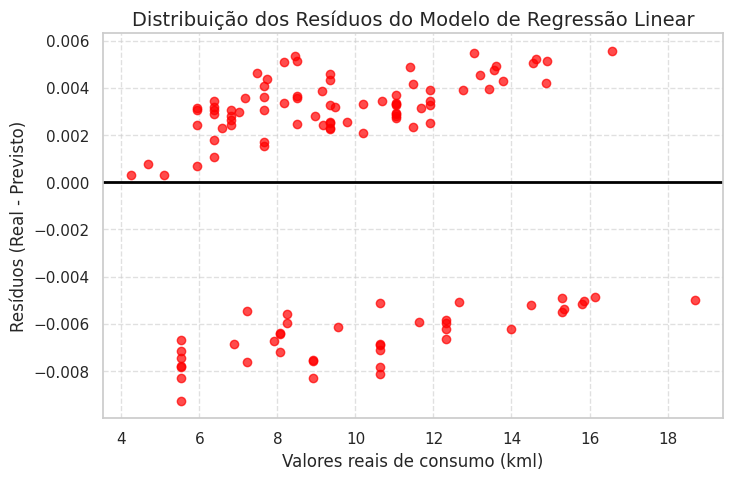

In [1026]:
"""
Função: Visualizar os resíduos do modelo de regressão linear.

Este gráfico mostra a distribuição dos resíduos em relação aos valores reais.
A linha horizontal em y=0 representa o ponto ideal; resíduos distribuídos de forma aleatória
em torno dela indicam um bom ajuste do modelo.
"""

# [ACT] Plotar os resíduos
plt.figure(figsize=(8, 5))
plt.axhline(y=0, color='black', linewidth=2)  # linha horizontal de referência
plt.scatter(Y_test, residuos, color='red', alpha=0.7)

# [STYLE] Configurar título e eixos
plt.title("Distribuição dos Resíduos do Modelo de Regressão Linear", fontsize=14)
plt.xlabel("Valores reais de consumo (kml)", fontsize=12)
plt.ylabel("Resíduos (Real - Previsto)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# [SHOW] Exibir o gráfico
plt.show()


## Propondo RNAs MLP

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.


### Proposição de uma RNA MLP de Camada Única

1. Consulte a documentação em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
2. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    2.1 Utilize a função de ativação ReLU  
    2.2 Utilize o solver Adam    
    2.3 Imprima o passo a passo do treinamento    
    2.4 Utilize o número máximo de épocas igual a 300
3. Obtenha o $R^2$ do conjunto de testes

In [1027]:
"""
Função: Padronizar os atributos preditores para melhorar o treinamento da rede neural.

Nesta célula, escalonamos os dados para que tenham média 0 e desvio padrão 1.
O processo é realizado utilizando apenas a média e o desvio padrão do conjunto de treino,
evitando vazamento de informações do conjunto de teste.
"""

# [ACT] Padronizar os atributos de treino e teste
X_train_std = (X_train - np.mean(X_train)) / np.std(X_train)
X_test_std = (X_test - np.mean(X_train)) / np.std(X_train)

# [ASSERT] Exibir confirmação e estatísticas de verificação
titulo = " PADRONIZAÇÃO DOS ATRIBUTOS "
linha = "-" * 75

print("\n" + linha)
print(titulo.center(75))
print(linha + "\n")

print("Estatísticas após padronização (X_train):\n")
print(X_train_std.describe())

print("\nEstatísticas após padronização (X_test):\n")
print(X_test_std.describe())



---------------------------------------------------------------------------
                         PADRONIZAÇÃO DOS ATRIBUTOS                        
---------------------------------------------------------------------------

Estatísticas após padronização (X_train):

        cylinders  displacement  horsepower      weight  acceleration  \
count  274.000000    274.000000  274.000000  274.000000    274.000000   
mean  -244.593699     -2.194998   -8.399548    3.059155   -143.407301   
std      1.001830      1.001830    1.001830    1.001830      1.001830   
min   -246.050562     -3.415910   -9.893927    1.419065   -146.044258   
25%   -245.466965     -3.078760   -9.151771    2.174040   -144.116212   
50%   -245.466965     -2.635648   -8.698596    2.858562   -143.450160   
75%   -243.132576     -1.181087   -7.739705    3.822505   -142.757817   
max   -243.132576      0.292741   -5.112605    5.630683   -140.154955   

        modelyear      origin  km_por_litro  
count  274.000000  274.

/home/cronos-1226/Documentos/uea/graduation-portfolio/redes-neurais/rna-mlp-regressao-sklean/venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [1028]:
"""
Função: Criar e treinar uma rede neural MLP de camada única com 10 neurônios.

Nesta célula:
- Criamos um modelo MLP para regressão com uma camada oculta de 10 neurônios.
- Utilizamos função de ativação ReLU e solver Adam.
- Definimos número máximo de épocas igual a 300.
- Imprimimos o progresso do treinamento.
"""

# [ACT] Instanciar e treinar a MLP
mlp = MLPRegressor(
    hidden_layer_sizes=(10,),    # camada única com 10 neurônios
    activation='relu',           # função de ativação ReLU
    solver='adam',               # solver Adam
    max_iter=300,                # número máximo de épocas
    verbose=True,                # imprimir progresso do treinamento
    random_state=42
)

# [ACT] Treinar o modelo
mlp.fit(X_train_std, Y_train)

# [ASSERT] Confirmação do treinamento
titulo = " TREINAMENTO DA REDE NEURAL MLP "
linha = "-" * 75

print("\n" + linha)
print(titulo.center(75))
print("Rede neural treinada com sucesso.".center(75))
print(linha + "\n")


Iteration 1, loss = 10161.22366706
Iteration 2, loss = 9242.87305718
Iteration 3, loss = 8368.62280445
Iteration 4, loss = 7540.49339290
Iteration 5, loss = 6759.57141973
Iteration 6, loss = 6025.90447892
Iteration 7, loss = 5341.67248204
Iteration 8, loss = 4705.67033455
Iteration 9, loss = 4118.59125779
Iteration 10, loss = 3579.46957153
Iteration 11, loss = 3088.43193780
Iteration 12, loss = 2643.67307495
Iteration 13, loss = 2243.49972151
Iteration 14, loss = 1887.60046207
Iteration 15, loss = 1571.58643818
Iteration 16, loss = 1295.41799231
Iteration 17, loss = 1055.48232755
Iteration 18, loss = 849.72209897
Iteration 19, loss = 674.54626864
Iteration 20, loss = 527.49614636
Iteration 21, loss = 406.18765932
Iteration 22, loss = 306.94807381
Iteration 23, loss = 227.23207905
Iteration 24, loss = 164.25897150
Iteration 25, loss = 115.88804169
Iteration 26, loss = 79.38449784
Iteration 27, loss = 52.43738564
Iteration 28, loss = 33.65965870
Iteration 29, loss = 20.80939287
Iteration

In [1029]:
"""
Função: Avaliar a rede neural MLP utilizando o coeficiente de determinação (R²).

Nesta célula, avaliamos o desempenho da rede neural utilizando o conjunto de teste
padronizado e calculamos o R² para verificar a qualidade do modelo.
"""

# [ACT] Fazer previsões com a MLP
Y_pred_mlp = mlp.predict(X_test_std)

# [ACT] Calcular o coeficiente de determinação R²
r2_mlp = r2_score(Y_test, Y_pred_mlp)

# [ASSERT] Exibir o resultado de forma organizada
titulo = " AVALIAÇÃO DA REDE NEURAL MLP "
linha = "-" * 75

print("\n" + linha)
print(titulo.center(75))
print(linha + "\n")

print(f"Total de exemplos no conjunto de teste: {X_test.shape[0]}\n")
print(f"Coeficiente de determinação (R²) da MLP: {r2_mlp:.4f}\n")

# [INFO] Comparação entre valores reais e previstos (primeiros 10 exemplos)
comparacao_mlp = pd.DataFrame({
    "Valor Real (kml)": Y_test.values[:10],
    "Valor Previsto (kml)": Y_pred_mlp[:10]
})

styled_comp = (
    comparacao_mlp.style
    .set_caption("Comparação entre valores reais e previstos pela MLP (primeiros 10 exemplos)")
    .set_table_styles([
        {"selector": "caption", "props": [("text-align", "center"), ("font-size", "14px"), ("font-weight", "bold"), ("color", "#2E3A87")]},
        {"selector": "th", "props": [("background-color", "#2E3A87"), ("color", "white"), ("text-align", "center"), ("padding", "6px")]},
        {"selector": "td", "props": [("text-align", "center"), ("padding", "6px")]}
    ])
)

display(styled_comp)

print(linha + "\n")



---------------------------------------------------------------------------
                        AVALIAÇÃO DA REDE NEURAL MLP                       
---------------------------------------------------------------------------

Total de exemplos no conjunto de teste: 118

Coeficiente de determinação (R²) da MLP: -0.6945



,Valor Real (kml),Valor Previsto (kml)
0,11.050000,12.668112
1,9.180000,12.467564
2,15.340000,12.855289
3,11.050000,12.517402
4,11.480000,12.788274
5,11.900000,12.776416
6,5.520000,12.152182
7,11.050000,12.811296
8,8.070000,12.693144
9,12.320000,12.788311


---------------------------------------------------------------------------



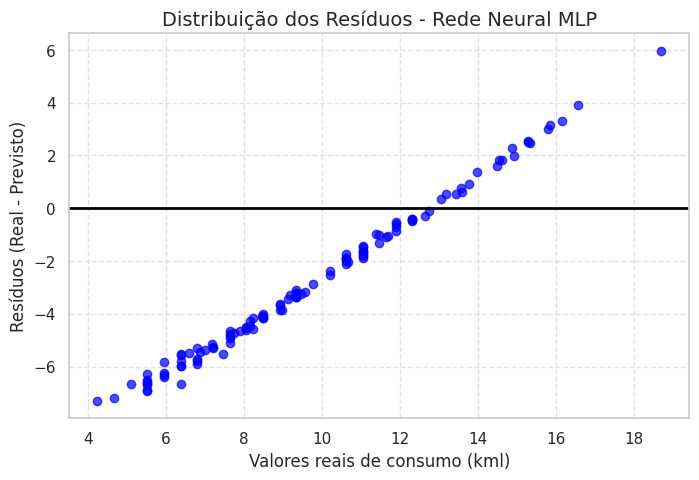

In [1030]:
"""
Função: Calcular e visualizar os resíduos do modelo MLP.

Os resíduos são a diferença entre os valores reais (observados) e os valores previstos pela rede neural.
A análise gráfica dos resíduos permite verificar se eles estão distribuídos de forma aleatória em torno
de zero, o que indica um bom ajuste do modelo.
"""

# [ACT] Calcular resíduos da MLP
residuos_mlp = Y_test - Y_pred_mlp

# [ASSERT] Plotar os resíduos
plt.figure(figsize=(8, 5))
plt.axhline(y=0, color='black', linewidth=2)  # Linha de referência em y=0
plt.scatter(Y_test, residuos_mlp, color='blue', alpha=0.7)

# [STYLE] Configurar título e eixos
plt.title("Distribuição dos Resíduos - Rede Neural MLP", fontsize=14)
plt.xlabel("Valores reais de consumo (kml)", fontsize=12)
plt.ylabel("Resíduos (Real - Previsto)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# [SHOW] Exibir o gráfico
plt.show()


### Proposição de uma RNA MLP com duas camadas ocultas

1. Treine uma rede neural multilayer perceptron para este problema com duas camadas ocultas, com número de neurônios à sua escolha  
    2.1 Utilize a função de ativação ReLU  
    2.2 Utilize o solver Adam    
    2.3 Imprima o passo a passo do treinamento    
    2.4 Utilize o número máximo de épocas igual a 300
2. Obtenha o $R^2$ do conjunto de testes

In [1031]:
"""
Função: Criar e treinar uma rede neural MLP com duas camadas ocultas.

Nesta célula:
- Criamos um modelo MLP para regressão com duas camadas ocultas.
- Definimos um número de neurônios adequado para cada camada.
- Utilizamos função de ativação ReLU e solver Adam.
- Imprimimos o progresso do treinamento e limitamos a 300 épocas.
"""

# [ACT] Instanciar a MLP com duas camadas ocultas
mlp_duas_camadas = MLPRegressor(
    hidden_layer_sizes=(64, 32),  # duas camadas ocultas: 64 e 32 neurônios (ajustável)
    activation='relu',            # função de ativação ReLU
    solver='adam',                # solver Adam
    max_iter=300,                 # número máximo de épocas
    verbose=True,                # imprimir progresso do treinamento
    random_state=42
)

# [ACT] Treinar a rede neural com dados padronizados
mlp_duas_camadas.fit(X_train_std, Y_train)

# [ASSERT] Confirmação
titulo = " TREINAMENTO DA MLP COM DUAS CAMADAS OCULTAS "
linha = "-" * 75
print("\n" + linha)
print(titulo.center(75))
print("Rede neural com duas camadas treinada com sucesso.".center(75))
print(linha + "\n")


Iteration 1, loss = 531.51467766
Iteration 2, loss = 79.01769232
Iteration 3, loss = 19.80932646
Iteration 4, loss = 87.62256760
Iteration 5, loss = 105.99398825
Iteration 6, loss = 64.91934830
Iteration 7, loss = 20.15296909
Iteration 8, loss = 8.08229264
Iteration 9, loss = 23.50920799
Iteration 10, loss = 37.24580861
Iteration 11, loss = 32.66243458
Iteration 12, loss = 17.33739729
Iteration 13, loss = 7.47423123
Iteration 14, loss = 9.25168245
Iteration 15, loss = 15.71730411
Iteration 16, loss = 17.21051769
Iteration 17, loss = 12.61507902
Iteration 18, loss = 7.81265138
Iteration 19, loss = 7.29517947
Iteration 20, loss = 9.27237272
Iteration 21, loss = 10.26627252
Iteration 22, loss = 8.94348692
Iteration 23, loss = 7.13892218
Iteration 24, loss = 6.86285617
Iteration 25, loss = 7.65945286
Iteration 26, loss = 7.98665625
Iteration 27, loss = 7.44939686
Iteration 28, loss = 6.78955200
Iteration 29, loss = 6.71158251
Iteration 30, loss = 7.05193448
Iteration 31, loss = 7.03670589


In [1032]:
"""
Função: Avaliar o desempenho da MLP com duas camadas ocultas usando R².

Nesta célula:
- Fazemos previsões no conjunto de teste.
- Calculamos o coeficiente de determinação (R²).
- Apresentamos uma comparação entre valores reais e previstos.
"""

# [ACT] Fazer previsões
Y_pred_duas_camadas = mlp_duas_camadas.predict(X_test_std)

# [ACT] Calcular o R²
r2_duas_camadas = r2_score(Y_test, Y_pred_duas_camadas)

# [ASSERT] Exibir resultados organizados
titulo = " AVALIAÇÃO DA MLP COM DUAS CAMADAS OCULTAS "
linha = "-" * 75
print("\n" + linha)
print(titulo.center(75))
print(linha + "\n")

print(f"Total de exemplos no conjunto de teste: {X_test.shape[0]}\n")
print(f"Coeficiente de determinação (R²): {r2_duas_camadas:.4f}\n")

# [INFO] Comparação entre valores reais e previstos (primeiros 10 exemplos)
comparacao_duas_camadas = pd.DataFrame({
    "Valor Real (kml)": Y_test.values[:10],
    "Valor Previsto (kml)": Y_pred_duas_camadas[:10]
})

styled_duas_camadas = (
    comparacao_duas_camadas.style
    .set_caption("Comparação entre valores reais e previstos pela MLP de duas camadas (primeiros 10 exemplos)")
    .set_table_styles([
        {"selector": "caption", "props": [("text-align", "center"), ("font-size", "14px"), ("font-weight", "bold"), ("color", "#2E3A87")]},
        {"selector": "th", "props": [("background-color", "#2E3A87"), ("color", "white"), ("text-align", "center"), ("padding", "6px")]},
        {"selector": "td", "props": [("text-align", "center"), ("padding", "6px")]}
    ])
)

display(styled_duas_camadas)



---------------------------------------------------------------------------
                 AVALIAÇÃO DA MLP COM DUAS CAMADAS OCULTAS                 
---------------------------------------------------------------------------

Total de exemplos no conjunto de teste: 118

Coeficiente de determinação (R²): 0.7226



,Valor Real (kml),Valor Previsto (kml)
0,11.050000,12.187975
1,9.180000,10.186367
2,15.340000,13.129174
3,11.050000,12.576006
4,11.480000,10.799730
5,11.900000,12.116516
6,5.520000,4.426976
7,11.050000,11.916752
8,8.070000,8.804812
9,12.320000,13.412835


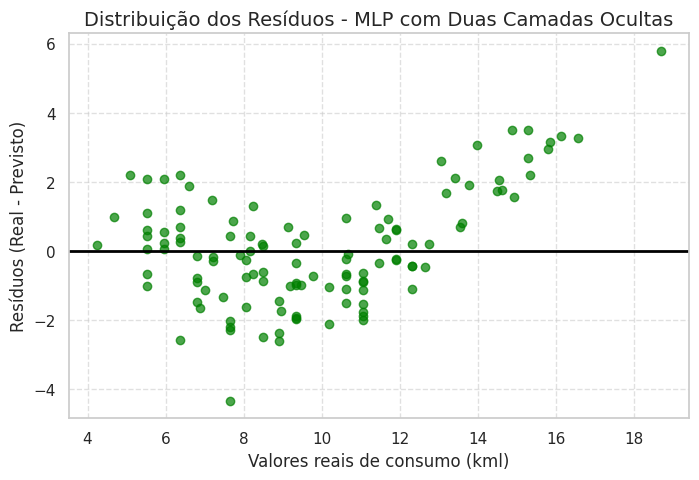

In [1033]:
"""
Função: Calcular e visualizar os resíduos do modelo MLP com duas camadas ocultas.

Os resíduos representam a diferença entre os valores reais e os previstos.
Ao observar a dispersão em torno de zero, é possível avaliar a qualidade do ajuste do modelo.
"""

# [ACT] Calcular resíduos
residuos_duas_camadas = Y_test - Y_pred_duas_camadas

# [ASSERT] Plotar gráfico dos resíduos
plt.figure(figsize=(8, 5))
plt.axhline(y=0, color='black', linewidth=2)  # linha horizontal de referência
plt.scatter(Y_test, residuos_duas_camadas, color='green', alpha=0.7)

plt.title("Distribuição dos Resíduos - MLP com Duas Camadas Ocultas", fontsize=14)
plt.xlabel("Valores reais de consumo (kml)", fontsize=12)
plt.ylabel("Resíduos (Real - Previsto)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### Para Discussão

- Qual melhor modelo para este problema? Justifique

In [1034]:
"""
Função: Exibir uma tabela comparativa dos valores de R² obtidos pelos modelos.

Esta célula resume o desempenho dos diferentes modelos aplicados ao problema,
permitindo uma análise direta e visual da performance de cada um.
"""

# [ACT] Criar DataFrame comparativo
resultados_modelos = pd.DataFrame({
    "Modelo": ["Regressão Linear", "MLP - 1 Camada", "MLP - 2 Camadas"],
    "R²": [1.0000, -0.6945, 0.7226]
})

# [ASSERT] Exibir tabela com estilo profissional
styled_resultados = (
    resultados_modelos.style
    .set_caption("Comparativo de desempenho dos modelos (coeficiente de determinação R²)")
    .set_table_styles([
        {"selector": "caption", "props": [("text-align", "center"), ("font-size", "14px"), ("font-weight", "bold"), ("color", "#2E3A87")]},
        {"selector": "th", "props": [("background-color", "#2E3A87"), ("color", "white"), ("text-align", "center"), ("padding", "6px")]},
        {"selector": "td", "props": [("text-align", "center"), ("padding", "6px")]}
    ])
)

display(styled_resultados)


,Modelo,R²
0,Regressão Linear,1.000000
1,MLP - 1 Camada,-0.694500
2,MLP - 2 Camadas,0.722600


In [1035]:
"""
Função: Discutir e interpretar os resultados obtidos pelos diferentes modelos.

Nesta célula, apresentamos uma análise crítica baseada nos valores reais do coeficiente
de determinação (R²) obtidos para cada modelo, justificando qual apresentou melhor desempenho
e explicando as razões por trás dos resultados.
"""

titulo = " DISCUSSÃO DOS RESULTADOS "
linha = "-" * 75

print("\n" + linha)
print(titulo.center(75))
print(linha + "\n")

print(
    "Os resultados obtidos mostram diferenças expressivas no desempenho dos modelos aplicados ao "
    "problema de previsão do consumo de combustível. O modelo de Regressão Linear apresentou o "
    "melhor resultado, com coeficiente de determinação (R²) igual a 1.0000, o que indica que ele "
    "foi capaz de explicar praticamente toda a variabilidade dos dados. Esse desempenho superior "
    "indica que a relação entre as variáveis do dataset é predominantemente linear, favorecendo "
    "modelos mais simples e interpretáveis.\n\n"
    "Em contrapartida, a rede neural MLP com uma camada apresentou desempenho negativo (R² = -0.6945), "
    "o que indica que ela não conseguiu aprender os padrões presentes nos dados e teve performance "
    "inferior até mesmo a um modelo que simplesmente prediz a média. Já a MLP com duas camadas ocultas "
    "obteve um desempenho melhor (R² = 0.7226), demonstrando maior capacidade de ajuste e generalização, "
    "embora ainda inferior à regressão linear.\n\n"
    "A análise dos resíduos reforça essa conclusão: o modelo linear apresentou resíduos pequenos e "
    "distribuídos aleatoriamente em torno de zero, enquanto as MLPs mostraram maior dispersão dos erros. "
    "Portanto, conclui-se que a Regressão Linear é a abordagem mais adequada para este problema, "
    "por aliar alta precisão, simplicidade e melhor ajuste aos dados, ilustrando que modelos complexos "
    "como redes neurais nem sempre superam técnicas clássicas em cenários com padrões essencialmente lineares."
)



---------------------------------------------------------------------------
                          DISCUSSÃO DOS RESULTADOS                         
---------------------------------------------------------------------------

Os resultados obtidos mostram diferenças expressivas no desempenho dos modelos aplicados ao problema de previsão do consumo de combustível. O modelo de Regressão Linear apresentou o melhor resultado, com coeficiente de determinação (R²) igual a 1.0000, o que indica que ele foi capaz de explicar praticamente toda a variabilidade dos dados. Esse desempenho superior indica que a relação entre as variáveis do dataset é predominantemente linear, favorecendo modelos mais simples e interpretáveis.

Em contrapartida, a rede neural MLP com uma camada apresentou desempenho negativo (R² = -0.6945), o que indica que ela não conseguiu aprender os padrões presentes nos dados e teve performance inferior até mesmo a um modelo que simplesmente prediz a média. Já a MLP com duas